In [36]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

In [76]:
data=np.load("/content/olivetti_faces.npy")
print(data)
target=np.load("/content/olivetti_faces_target.npy")

[[[0.30991736 0.3677686  0.41735536 ... 0.37190083 0.3305785  0.30578512]
  [0.3429752  0.40495867 0.43801653 ... 0.37190083 0.338843   0.3140496 ]
  [0.3429752  0.41735536 0.45041323 ... 0.38016528 0.338843   0.29752067]
  ...
  [0.21487603 0.20661157 0.2231405  ... 0.15289256 0.16528925 0.17355372]
  [0.20247933 0.2107438  0.2107438  ... 0.14876033 0.16115703 0.16528925]
  [0.20247933 0.20661157 0.20247933 ... 0.15289256 0.16115703 0.1570248 ]]

 [[0.45454547 0.47107437 0.5123967  ... 0.19008264 0.18595041 0.18595041]
  [0.446281   0.48347107 0.5206612  ... 0.21487603 0.2107438  0.2107438 ]
  [0.49586776 0.5165289  0.53305787 ... 0.20247933 0.20661157 0.20661157]
  ...
  [0.77272725 0.78099173 0.7933884  ... 0.1446281  0.1446281  0.1446281 ]
  [0.77272725 0.7768595  0.7892562  ... 0.13636364 0.13636364 0.13636364]
  [0.7644628  0.7892562  0.78099173 ... 0.15289256 0.15289256 0.15289256]]

 [[0.3181818  0.40082645 0.49173555 ... 0.40082645 0.3553719  0.30991736]
  [0.30991736 0.396694

In [38]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [39]:
print("unique target number:",np.unique(target))


unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [91]:
def showPhoto(images, unique_ids):
    fig, ax=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    ax=ax.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        ax[unique_id].imshow(images[image_index], cmap='gray')
        ax[unique_id].set_xticks([])
        ax[unique_id].set_yticks([])
        ax[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

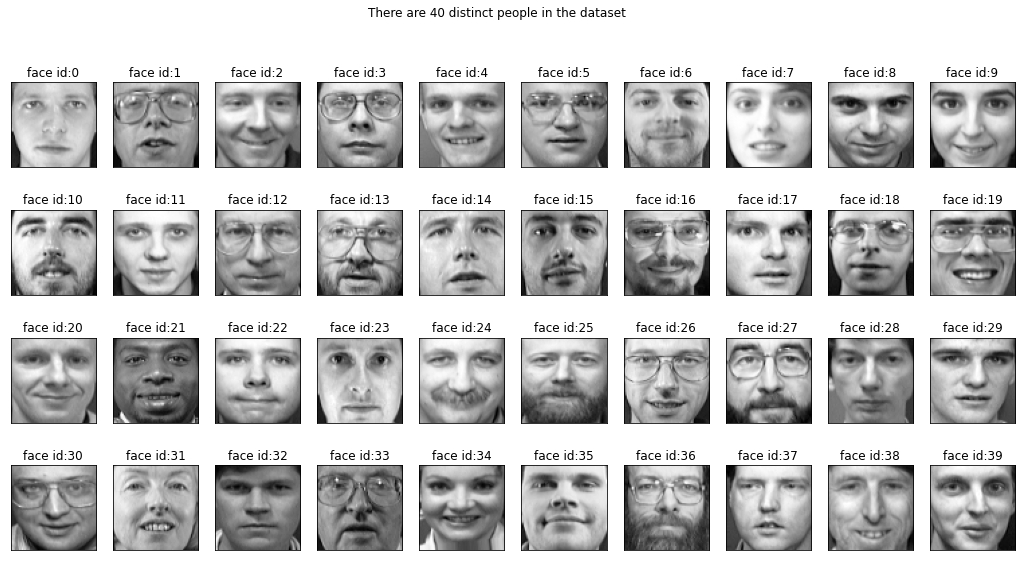

In [92]:
showPhoto(data, np.unique(target))


In [42]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10
    rows=(len(subject_ids)*10)/cols 
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

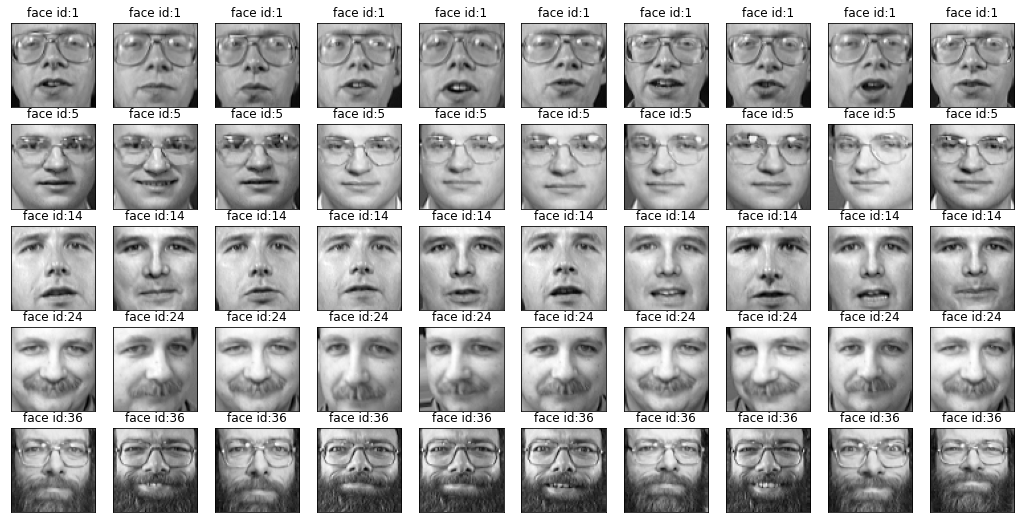

In [43]:
show_10_faces_of_n_subject(images=data, subject_ids=[1,5, 14, 24, 36])

In [44]:
#hena ben7wl mn 3D ela 2D array
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)


In [ ]:
print(np.)

In [46]:
print(np.array(target))

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32

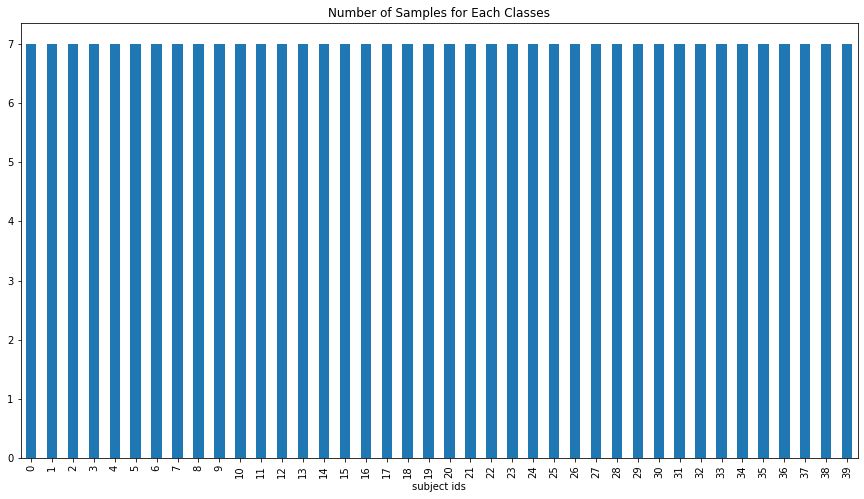

In [47]:
import pandas as pd

y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

In [48]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

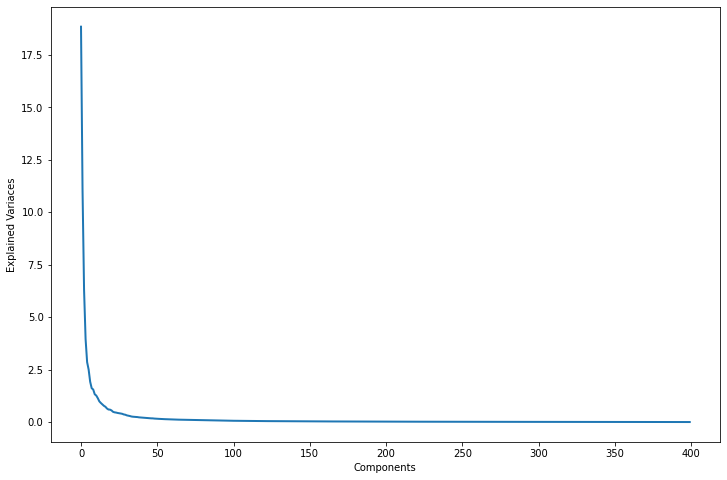

In [49]:
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

## Feature **Scaling**

In [50]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [54]:
X_train=X_train_pca/255
X_test=X_test_pca/255

In [52]:
from sklearn.neural_network import MLPRegressor
MLPRegressorModel = MLPRegressor(activation='tanh', 
                                 solver='lbfgs',  
                                 learning_rate='constant', 
                                 early_stopping= False,
                                 alpha=0.000001 ,hidden_layer_sizes=(100, 4),random_state=33)
MLPRegressorModel.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(activation='tanh', alpha=1e-06, hidden_layer_sizes=(100, 4),
             random_state=33, solver='lbfgs')

In [55]:
print('MLPRegressorModel Train Score is : ' , MLPRegressorModel.score(X_train, y_train))
print('MLPRegressorModel Test Score is : ' , MLPRegressorModel.score(X_test, y_test))

MLPRegressorModel Train Score is :  0.7755909745238224
MLPRegressorModel Test Score is :  0.5831767013428502


In [59]:
y_pred=MLPRegressorModel.predict(X_test)
y_pred=np.round(y_pred)
print(y_pred)

[19.  8. 32.  5. 33. 14. 32. 10. 22. 14.  7. 15. 36. 14. 13.  8. 36. 30.
  5. 13. 11. 25. 36. 19. 12. 33. 24.  9. 26. 35. 12. 32. 20. 17. 36. 15.
 23.  8. 27.  5.  6. 22. 33. 25.  6. 31. 35. 28. 26.  8. 35. 15. 16. 18.
 13. 15. 30. 16. 17. 34. 15. 30. 16. 35. 32. 33.  9. 35.  7.  9. 25. 20.
 37. 12. 15.  8. 20.  9.  7. 15. 30. 16. 20. 27. 17.  9. 32. 37. 17. 19.
 14. 13.  8. 15. 24. 26. 33. 19. 32. 23. 30.  7. 11. 11. 25. 10. 24.  4.
 26. 25. 27. 20. 18. 32. 28.  8. 20.  6.  7. 23.]


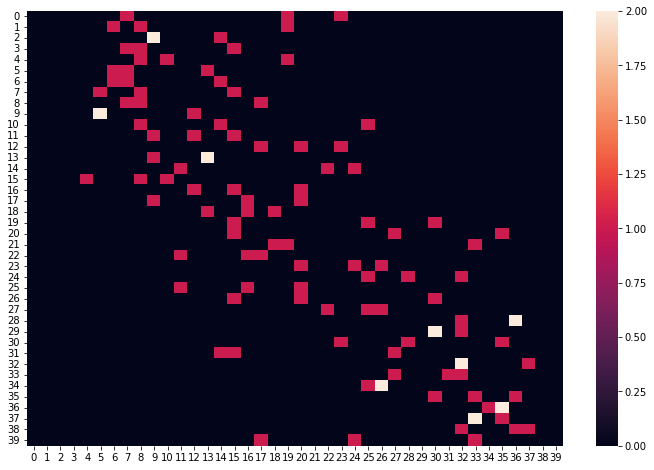

In [62]:
from sklearn import metrics
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

In [87]:
name_dict={0:'michael',1:'john',2:'messi',3:'neymar',4:'sam',5:'zawe',6:'locus',7:'adriano',8:'hernadez',9:'adel',10:'masoud',11:'salim',14:'shalabi',15:'hosany',16:'caspar',17:'peter',18:'hamdy',19:'hossam',20:'swilam',21:'saad',22:'sead',23:'said',24:'elsaid',25:'elsead',27:'elhosany',28:'elrefa3y',29:'eljhini',30:'elshreaf',31:'Mos3ab',32:'mohsen',33:'zakaria',34:'reda',35:'ashraf',36:'kamal',37:'kamel',38:'emad',39:'Taha'}

Original Name: swilam
Predicted Name: elhosany


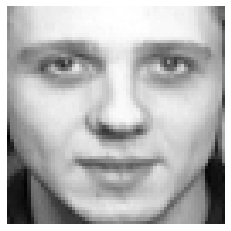

In [90]:
image_index =110
print("Original Name:",name_dict[ y_test[image_index]])
# predict from model
print("Predicted Name:",name_dict[ y_pred[image_index]])
plt.axis('off')
plt.imshow(data[image_index].reshape(64, 64), cmap='gray');

Original Name: zawe
Predicted Name: adriano


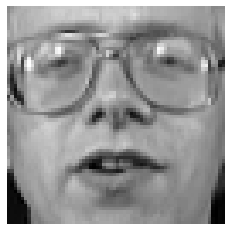

In [93]:
image_index =10
print("Original Name:",name_dict[ y_test[image_index]])
# predict from model
print("Predicted Name:",name_dict[ y_pred[image_index]])
plt.axis('off')
plt.imshow(data[image_index].reshape(64, 64), cmap='gray');